# Unsupervised Machine Learning Project
# Google Travel Review Data
## By: Denis O'Byrne
## Date: 07/06/2022

# Required
### Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.

### Sections required in your report:

### Main objective of the analysis that also specifies whether your model will be focused on clustering or dimensionality reduction and the benefits that your analysis brings to the business or stakeholders of this data.

### Brief description of the data set you chose, a summary of its attributes, and an outline of what you are trying to accomplish with this analysis.

### Brief summary of data exploration and actions taken for data cleaning orfeature engineering.

### Summary of training at least three variations of the unsupervised model you selected. For example, you can use different clustering techniques or different hyperparameters.

### A paragraph explaining which of your Unsupervised Learning models you recommend as a final model that best fits your needs in terms.

### Summary Key Findings and Insights, which walks your reader through the main findings of your modeling exercise.

### Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model or adding specific data features to achieve a better model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
pd.set_option('display.max_columns', None)

# Google Travel Review Dataset

In [3]:
trav_rev = pd.read_csv("C:/Users/denis/Desktop/IBM Machine Learning/Final Projects/data/google_review_ratings.csv", sep = ",", header = 0)

In [4]:
trav_rev.describe()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Category 12,Category 13,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,5455.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5455.000000,2.000000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,2.078339,2.125511,2.190861,2.206573,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560755,1.810000
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,1.249208,1.406542,1.576686,1.715961,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171756,1.088944
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,0.780000,0.770000,0.760000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.040000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,1.290000,1.190000,1.030000,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000,1.425000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,1.690000,1.610000,1.490000,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000,1.810000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,2.285000,2.360000,2.740000,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000,2.195000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.580000


In [5]:
trav_rev.columns

Index(['User', 'Category 1', 'Category 2', 'Category 3', 'Category 4',
       'Category 5', 'Category 6', 'Category 7', 'Category 8', 'Category 9',
       'Category 10', 'Category 11', 'Category 12', 'Category 13',
       'Category 14', 'Category 15', 'Category 16', 'Category 17',
       'Category 18', 'Category 19', 'Category 20', 'Category 21',
       'Category 22', 'Category 23', 'Category 24', 'Unnamed: 25'],
      dtype='object')

In [6]:
trav_rev[trav_rev['Unnamed: 25'].notnull()]

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Category 11,Category 12,Category 13,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
1347,User 1348,1.06,1.10,5.00,3.28,5.00,5.00,5.00,1.83,1.81,5.00,5,1.74,1.73,1.74,1.77,1.80,0.0,0.00,0.0,0.00,0.0,5.0,0.26,NaN,1.04
2712,User 2713,1.71,1.68,1.46,1.13,1.12,1.15,1.26,1.17,1.59,0.85,2\t2.,NaN,0.84,5.00,5.00,1.08,1.1,1.04,5.0,4.43,5.0,5.0,5.00,2.57,2.58


# The unnamed:25 column is a data entry mistake, there should only be 24 categories plus the user number column. We can see that the two users with faulty data are users 1348 and 2713.  Examining these rows we see:

## User 1348 has the 24th category accidentally stored in the 25th column

## User 2712 stores the category 11 as "2\t2." then skips over category 12, indicating that actually category 11 should be 2 and category 12 is 0.84

## We can fix these mistakes in python, but looking at the text file of the data it can be seen that these rows accidentally store some of the data as strings which is why the data entry error occured, so I will manually fix these and save them in a new file.

In [7]:
trav_rev = pd.read_csv("C:/Users/denis/Desktop/IBM Machine Learning/Final Projects/data/google_review_ratings_fixed.csv", sep = ",")

In [8]:
trav_rev.describe()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Category 11,Category 12,Category 13,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,0.0
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,2.549971,2.078112,2.126274,2.190861,2.205854,1.192804,0.949192,0.823140,0.969707,1.000176,0.965838,1.750537,1.531008,1.560662,NaN
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,1.381663,1.249206,1.406972,1.576686,1.715611,1.107004,0.973535,0.949592,1.203646,1.194216,0.929853,1.598734,1.316126,1.171672,NaN
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,0.780000,0.780000,0.770000,0.760000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,1.580000,1.290000,1.190000,1.030000,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000,NaN
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,2.000000,1.690000,1.610000,1.490000,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000,NaN
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,3.220000,2.282500,2.360000,2.740000,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000,NaN
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,NaN


# Since all rows were strored with a trailing comma we still have to remove the extra empty column

In [9]:
trav_rev = trav_rev.drop(columns = ['Unnamed: 25'])

In [10]:
trav_rev

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Category 11,Category 12,Category 13,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
0,User 1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,1.70,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
1,User 2,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,2.65,1.70,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
2,User 3,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,1.70,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
3,User 4,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,2.64,1.73,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
4,User 5,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,1.70,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,User 5452,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,1.04,1.02,1.06,1.29,1.29,5.00,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56
5452,User 5453,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,1.02,1.01,1.04,1.27,1.27,0.89,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09
5453,User 5454,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,1.00,0.99,1.00,1.08,1.25,0.87,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11
5454,User 5455,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,0.98,0.97,0.98,1.06,1.23,5.00,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12


# Data Description

## This data set comes from the UCI ML Repository linked  [here](https://archive.ics.uci.edu/ml/datasets/Tarvel+Review+Ratings)

## The dataset description is given as follows:

### This data set is populated by capturing user ratings from Google reviews. Reviews on attractions from 24 categories across Europe are considered. Google user rating ranges from 1 to 5 and average user rating per category is calculated.


## The feature variables are listed as well:

# User : Unique user id
# Category 1 : Average ratings on churches
# Category 2 : Average ratings on resorts
# Category 3 : Average ratings on beaches
# Category 4 : Average ratings on parks
# Category 5 : Average ratings on theatres
# Category 6 : Average ratings on museums
# Category 7 : Average ratings on malls
# Category 8 : Average ratings on zoo
# Category 9 : Average ratings on restaurants
# Category 10 : Average ratings on pubs/bars
# Category 11 : Average ratings on local services
# Category 12 : Average ratings on burger/pizza shops
# Category 13 : Average ratings on hotels/other lodgings
# Category 14 : Average ratings on juice bars
# Category 15 : Average ratings on art galleries
# Category 16 : Average ratings on dance clubs
# Category 17 : Average ratings on swimming pools
# Category 18 : Average ratings on gyms
# Category 19 : Average ratings on bakeries
# Category 20 : Average ratings on beauty & spas
# Category 21 : Average ratings on cafes
# Category 22 : Average ratings on view points
# Category 23 : Average ratings on monuments
# Category 24 : Average ratings on gardens

# For my convenience in understanding my analysis I will relable the columns accordingly

In [11]:
feats = {'Category 1': 'Churches', 'Category 2': 'Resorts', 'Category 3': 'Beaches', 'Category 4': 'Parks', 'Category 5': 'Theaters', 'Category 6': 'Museums', 'Category 7': 'Malls', 'Category 8': 'Zoos', 'Category 9': 'Restaurants', 'Category 10': 'Bars', 'Category 11': 'Services', 'Category 12': 'Pizza/Burgers', 'Category 13': 'Hotels', 'Category 14': 'Juice Shops', 'Category 15': 'Art', 'Category 16': 'Dance Clubs', 'Category 17': 'Pools', 'Category 18': 'Gyms', 'Category 19': 'Bakeries', 'Category 20': 'Spas', 'Category 21': 'Cafes', 'Category 22': 'View Points', 'Category 23': 'Monuments', 'Category 24': 'Gardens'}
trav_rev = trav_rev.rename(columns = feats)

# Lastly the users are in numeric order so we do not need this column as it is redundant with the row numbers

In [12]:
trav_rev = trav_rev.drop(columns = {'User'})

In [13]:
trav_rev

,Churches,Resorts,Beaches,Parks,Theaters,Museums,Malls,Zoos,Restaurants,Bars,Services,Pizza/Burgers,Hotels,Juice Shops,Art,Dance Clubs,Pools,Gyms,Bakeries,Spas,Cafes,View Points,Monuments,Gardens
0,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,1.70,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,2.65,1.70,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
2,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,1.70,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
3,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,2.64,1.73,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
4,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,1.70,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,1.04,1.02,1.06,1.29,1.29,5.00,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56
5452,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,1.02,1.01,1.04,1.27,1.27,0.89,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09
5453,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,1.00,0.99,1.00,1.08,1.25,0.87,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11
5454,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,0.98,0.97,0.98,1.06,1.23,5.00,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12


# Exploratory Data Analysis

### First I would like to check for any missing data

In [14]:
trav_rev.isna().sum()

Churches         0
Resorts          0
Beaches          0
Parks            0
Theaters         0
Museums          0
Malls            0
Zoos             0
Restaurants      0
Bars             0
Services         0
Pizza/Burgers    0
Hotels           0
Juice Shops      0
Art              0
Dance Clubs      0
Pools            0
Gyms             0
Bakeries         0
Spas             0
Cafes            0
View Points      0
Monuments        0
Gardens          0
dtype: int64

# This looks ok, however the creator of the dataset has chosen to set review scores to 0 if the user has not left a review on a certain type of establishment. This fact is not explicitly stated on the UCI source page, but it is known that the minimum score on a google review is 1, meaning any score below 1 indicates the user did not visit or leave a review on that type of buisness in some cities. I expect that this data set is sparse, as not every person who goes on vacation does all of these types of activities on every vacation, so I would like to confirm my suspicion.

In [19]:
for i in trav_rev.columns:
    print(i, (trav_rev[i]==0).sum())

Churches 195
Resorts 90
Beaches 4
Parks 0
Theaters 0
Museums 0
Malls 0
Zoos 0
Restaurants 0
Bars 0
Services 0
Pizza/Burgers 0
Hotels 0
Juice Shops 0
Art 4
Dance Clubs 112
Pools 479
Gyms 1017
Bakeries 1046
Spas 896
Cafes 604
View Points 345
Monuments 302
Gardens 225


## This information shows us two things:
### 1. All users have left at least 1 review on Parks, Theaters, Museums, Malls, Zoos, Restaurants, Bars, Services, Pizza/Burgers, and Juice Shops.

### 2. Travelers are least likely to leave a review on a Gym or a Bakery. For gyms this makes sense to me as most people do not sign up for a gym membership on a vacation as they are most likely trying to relax, however I am unsure why the bakery review scores are absent.

# Histograms of Review Scores by Buisness

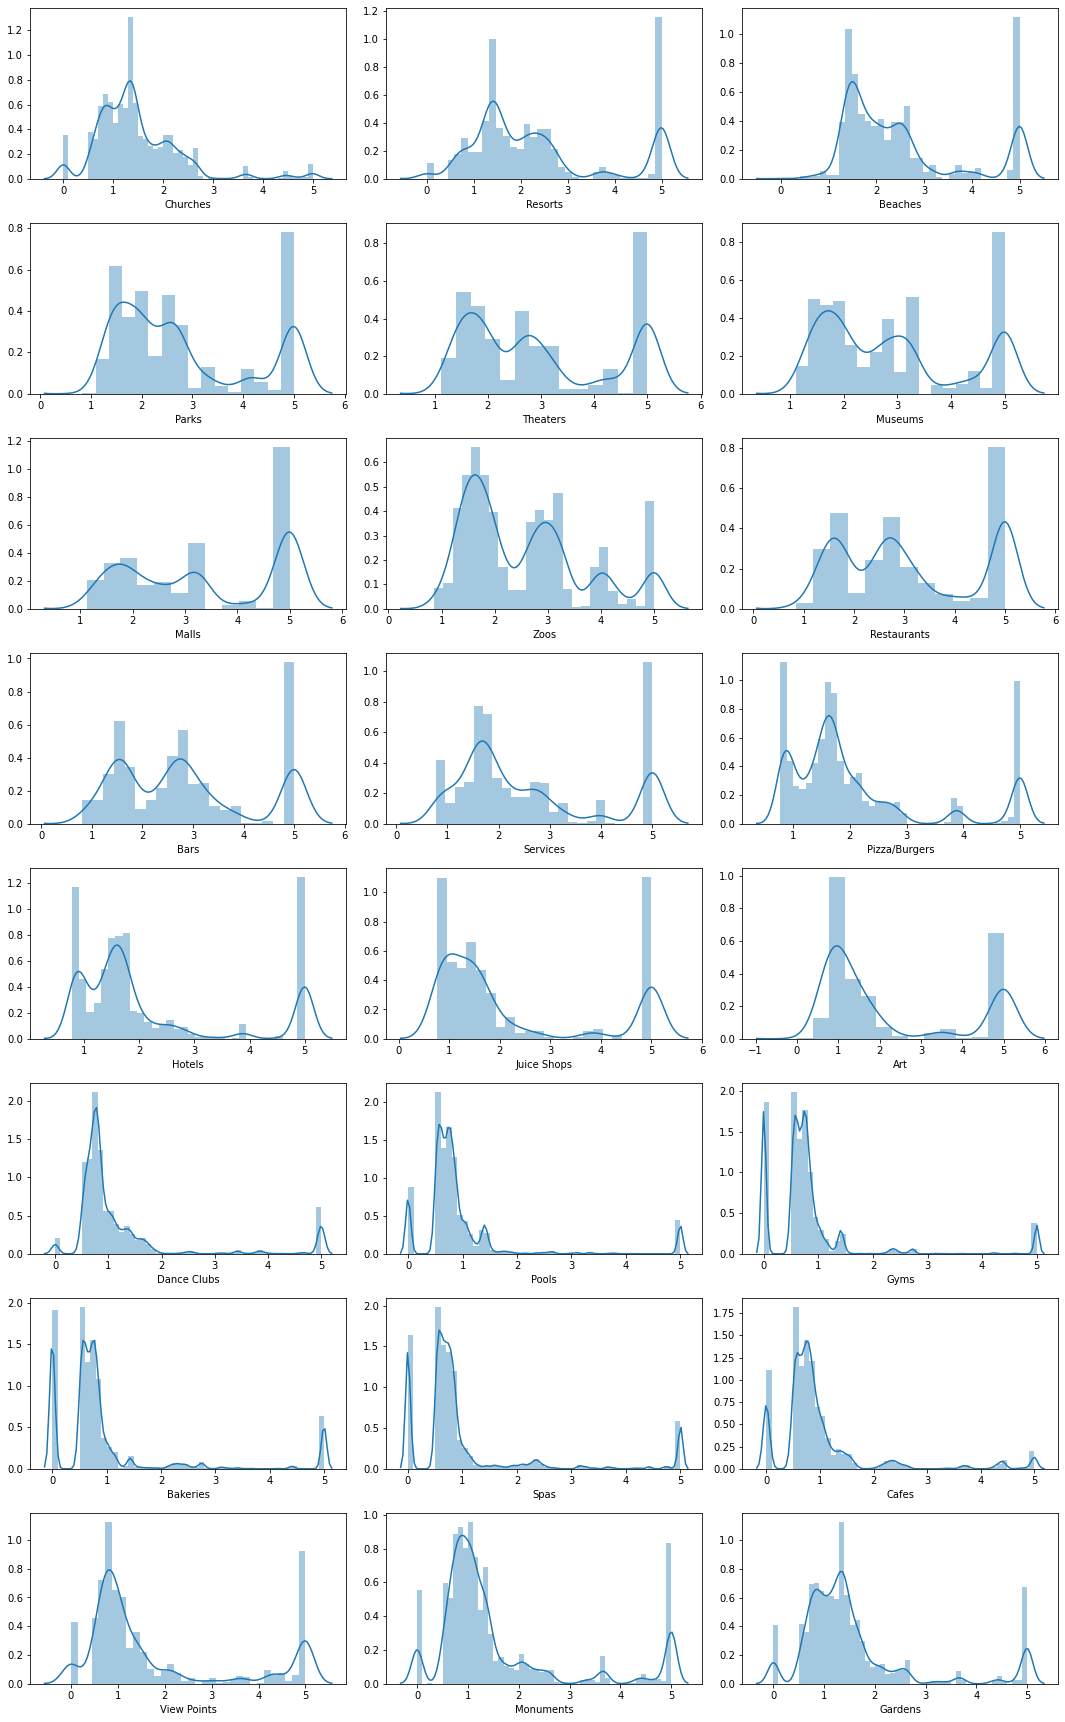

In [20]:
plt.figure(figsize=[15,3*math.ceil(24/3)])
for c in range(24):
    plt.subplot(math.ceil(24/3),3,c+1)
    sns.distplot(trav_rev[trav_rev.columns[c]])
plt.tight_layout()
plt.show()

### We see that many of these features have review scores clumped into distinct groups, indicating that our plan to categorize users seems reasonable. We should note that in many features there are a large portion of reviews with a score between 0-1 indicating these people have not visited the majority of buisnesses used to collect scores, but they have visted at least 1. This means we may be clumping users who have a recently sparked interest in a type of buisness or activity, but have not had the opportunity to visit more famous places related to that activity, and thus their score is artificially low in this category, with users who went to a related buisness, and hated it so they never went to other related places. If our model is intended to be used to advertise to these types of users it may be important to see the individual scores they left on each type of monument in that class of activity to decide if they may like to visit more of these establishments.

## Lastly before we begin with modeling I would like to see that there is a correlation between activities, so that we know uses in groups in one category may have similar interests in another category.

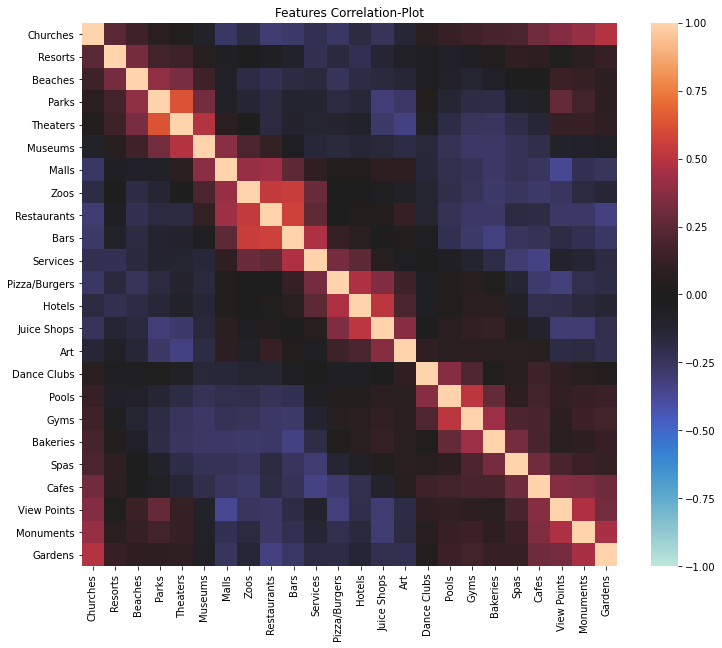

In [21]:
features = trav_rev.columns
plt.figure(figsize=[12,10])
plt.title('Features Correlation-Plot')
sns.heatmap(trav_rev[features].corr(), vmin=-1, vmax=1, center=0) #, 
plt.show()

## We see that there exist mild correlations (around 0.5 or -0.5) between many of the categories indicating users are likely to have similar opinions on multiple categories, suggesting that there may exist groups of similar users, indicating our plan to cluster users makes sense

# Since correlation seems to be quite high across multiple features, many may be redundant, indicating we should reduce our number of features, so I will use Principle Component Analysis to find vectors consisting of these features that span the data efficiently.

In [22]:
from sklearn.decomposition import PCA

In [37]:
pca = PCA(n_components=24)
principalComponents = pca.fit_transform(trav_rev)

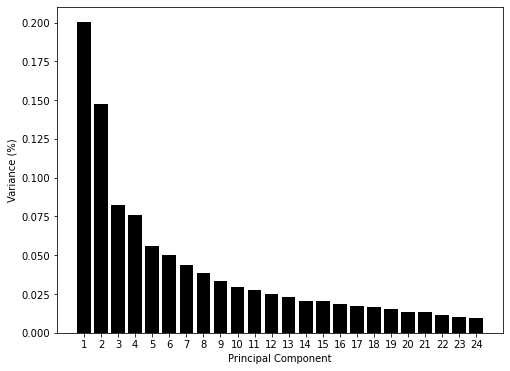

In [38]:
ncomps = range(1,pca.n_components_+1)
plt.figure(figsize=(8, 6))
plt.bar(ncomps, pca.explained_variance_ratio_, color='black')
plt.xlabel('Principal Component')
plt.ylabel('Variance (%)')
plt.xticks(ncomps)

PCA_components = pd.DataFrame(principalComponents)

In [39]:
pca.explained_variance_ratio_

array([0.20026862, 0.14780138, 0.08232336, 0.07617872, 0.05613853,
       0.05007583, 0.04348025, 0.03849406, 0.03358119, 0.02936284,
       0.02762409, 0.02509851, 0.02331835, 0.02060252, 0.02023847,
       0.01826315, 0.01725737, 0.01660185, 0.01543908, 0.01353878,
       0.01317176, 0.01120148, 0.01029035, 0.00964946])

In [40]:
pca.explained_variance_ratio_.cumsum()

array([0.20026862, 0.34807   , 0.43039335, 0.50657207, 0.5627106 ,
       0.61278644, 0.65626669, 0.69476075, 0.72834194, 0.75770479,
       0.78532888, 0.81042739, 0.83374573, 0.85434825, 0.87458672,
       0.89284987, 0.91010724, 0.92670909, 0.94214817, 0.95568694,
       0.9688587 , 0.98006018, 0.99035054, 1.        ])

In [41]:
pca.components_

array([[ 1.58768151e-01,  1.50335259e-01,  1.81179072e-01,
         2.21237574e-01,  1.79786102e-01,  2.76504835e-02,
        -2.31095481e-01, -1.67818738e-01, -2.67006869e-01,
        -2.37847217e-01, -2.18632488e-01, -2.17713286e-01,
        -2.35738581e-01, -3.11461287e-01, -2.66399967e-01,
         3.87621219e-02,  4.50448256e-02,  4.61312555e-02,
         7.00286648e-02,  1.09968566e-01,  1.39208120e-01,
         3.76088817e-01,  2.75795826e-01,  2.22731889e-01],
       [ 5.95878106e-02, -7.71165390e-02, -1.18504757e-01,
        -2.40769156e-01, -3.14908471e-01, -3.32430468e-01,
        -2.78351669e-01, -2.26369502e-01, -2.23911744e-01,
        -2.13202339e-01, -9.42855028e-02,  1.03014176e-01,
         1.71921404e-01,  2.92536551e-01,  3.11369253e-01,
         1.02582861e-01,  1.81333407e-01,  2.15198429e-01,
         2.88645697e-01,  2.16507586e-01,  1.35846717e-01,
         7.73261452e-02,  5.92880224e-02,  7.10928206e-02],
       [ 4.57551783e-02, -2.37698927e-01, -2.65403440e

### PCA requires the user to limit the number of variables used by setting a limit on either the minimum explained variance required to be included in the model or the minimum components required to exceed a given cumulative explained variance level.
### If we choose to retain 95% cumulative explained variance we would require the top 20 features, while selecting to limit features to a minimum of 2% explained variance we would require the top 15 features.

### For my analysis I will use the top 16 principal components, which would retain 89.3% cumulative explained variance while reducing the number of features in the model to 2/3 the original size.

In [36]:
PCA_components

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,-1.052887,-2.553135,-2.172005,0.867045,-0.276777,-1.984864,-2.285669,-0.721195,-0.627385,-0.720109,0.540514,1.037801,-0.335865,0.713083,0.009993,-1.012037,-0.105034,-1.319140,-0.825278,0.301501,-0.630988,-0.092369,0.143780,-0.346816
1,-1.103933,-2.620914,-2.117505,0.837074,-0.292849,-1.970292,-2.221997,-0.691949,-0.591764,-0.703469,0.516729,1.016843,-0.396988,0.701834,0.082329,-0.993977,-0.142534,-1.355371,-0.918275,0.176372,-0.696958,0.060125,0.177006,-0.353498
2,-1.105980,-2.613966,-2.116888,0.833305,-0.299975,-1.974098,-2.220027,-0.690115,-0.594884,-0.710165,0.517021,1.014398,-0.392426,0.696292,0.077475,-0.985833,-0.144664,-1.356626,-0.918380,0.179061,-0.708764,0.059701,0.175650,-0.355409
3,-0.988703,-2.589706,-2.275535,0.735527,-0.342469,-1.618380,-2.173068,-0.642063,-0.572727,-0.650340,0.537596,0.902441,-0.211471,0.676791,-0.053783,-0.957081,-0.040674,-1.335772,-0.834742,0.327200,-0.599906,-0.112880,0.154233,-0.406241
4,-1.105980,-2.613966,-2.116888,0.833305,-0.299975,-1.974098,-2.220027,-0.690115,-0.594884,-0.710165,0.517021,1.014398,-0.392426,0.696292,0.077475,-0.985833,-0.144664,-1.356626,-0.918380,0.179061,-0.708764,0.059701,0.175650,-0.355409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,4.648951,2.632830,-1.069270,-2.783766,2.910645,1.337706,1.465940,-1.124221,-1.366152,0.820682,1.089004,1.374795,1.922408,-0.180315,0.173619,1.989870,0.101901,0.346353,-1.207442,-0.605646,-0.201361,-0.796430,0.034582,-1.614564
5452,5.519983,1.024050,-0.180017,-0.483411,0.287683,1.411841,1.139568,-1.112144,-0.387282,-0.586780,0.889989,-0.389707,1.362306,1.702408,-1.067836,1.905034,0.162142,-0.402838,-0.110463,-0.719631,-0.237900,-0.674157,-0.100350,-1.390074
5453,5.927533,1.475935,-0.168715,-1.162493,0.204403,1.442385,1.485096,-2.284135,-0.174632,0.490961,0.768439,1.651996,2.247394,0.505503,-0.228680,2.350101,0.134081,0.357698,-0.958632,-0.556316,-0.175472,-0.743057,0.014607,-1.406733
5454,4.722185,2.873749,-0.781995,-2.544593,3.015745,0.862909,0.791576,-1.605738,-1.553322,0.697312,0.979939,1.515090,1.554206,0.119681,0.329543,2.241335,0.083873,0.380613,-1.252600,-0.630818,-0.385875,-0.686041,0.015042,-1.342484


In [42]:
pca = PCA(n_components=16)
principalComponents = pca.fit_transform(trav_rev)
PCA_components = pd.DataFrame(principalComponents)

In [43]:
PCA_components

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.052887,-2.553135,-2.172005,0.867045,-0.276777,-1.984864,-2.285669,-0.721195,-0.627385,-0.720109,0.540514,1.037801,-0.335865,0.713083,0.009993,-1.012037
1,-1.103933,-2.620914,-2.117505,0.837074,-0.292849,-1.970292,-2.221997,-0.691949,-0.591764,-0.703469,0.516729,1.016843,-0.396988,0.701834,0.082329,-0.993977
2,-1.105980,-2.613966,-2.116888,0.833305,-0.299975,-1.974098,-2.220027,-0.690115,-0.594884,-0.710165,0.517021,1.014398,-0.392426,0.696292,0.077475,-0.985833
3,-0.988703,-2.589706,-2.275535,0.735527,-0.342469,-1.618380,-2.173068,-0.642063,-0.572727,-0.650340,0.537596,0.902441,-0.211471,0.676791,-0.053783,-0.957081
4,-1.105980,-2.613966,-2.116888,0.833305,-0.299975,-1.974098,-2.220027,-0.690115,-0.594884,-0.710165,0.517021,1.014398,-0.392426,0.696292,0.077475,-0.985833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,4.648951,2.632830,-1.069270,-2.783766,2.910645,1.337706,1.465940,-1.124221,-1.366152,0.820682,1.089004,1.374795,1.922408,-0.180315,0.173619,1.989870
5452,5.519983,1.024050,-0.180017,-0.483411,0.287683,1.411841,1.139568,-1.112144,-0.387282,-0.586780,0.889989,-0.389707,1.362306,1.702408,-1.067836,1.905034
5453,5.927533,1.475935,-0.168715,-1.162493,0.204403,1.442385,1.485096,-2.284135,-0.174632,0.490961,0.768439,1.651996,2.247394,0.505503,-0.228680,2.350101
5454,4.722185,2.873749,-0.781995,-2.544593,3.015745,0.862909,0.791576,-1.605738,-1.553322,0.697312,0.979939,1.515090,1.554206,0.119681,0.329543,2.241335


### Now that the data dimension is reduced we can begin to run clustering algorithms to group the users

# K Means Clustering

## What is K Means solving?

## Given a set of observations this algorithm attempts to produce k clusters of the data and minimize the intra-cluster sum of squares. 

## If we let X=(x1, ... , xn) be the dataset where each xi is an d dimensional observation of   d features and S1, ... , Sk represent the k clusters, then the algorithm attempts to solve the following equation:
![K Means Sum of Squares Equation](https://wikimedia.org/api/rest_v1/media/math/render/svg/8dc15ec63e0676fc07e790f61efd89484a6b7922)

## where mu_i is the mean of the points in cluster Si

## This problem is equivalent to minimizing the pairwise squared deviation of points within the same cluster formulated below:
![Pairwise Squared Deviations Formula](https://wikimedia.org/api/rest_v1/media/math/render/svg/01cc35bfd582b45ae43d242d53664cf40b1adfc2)





## Naive Algorithm:

## There are faster methods to solve K Means, but the most basic solution is presented here:

## Step 1. Select Points to use as the inital centers of the clusters. These points can be selected at random from the set of observations, but there is a faster and smarter way to initalize the points known as K Means ++ which we will be using. This method is broken down into 5 parts:

### K Means++ 1. Chose the center for the first cluster as a random observation.

### K Means++ 2. For each data point x not chosen yet, compute D(x), the distance between x and the nearest center that has already been chosen.

### K Means++ 3. Choose one new data point at random as a new center, using a weighted probability distribution where a point x is chosen with probability proportional to D(x)^2.

### K Means ++ 4. Repeat Steps 2 and 3 until k centers have been chosen.

### K Means ++ 5. Now that the initial centers have been chosen, proceed using standard k-means clustering.


## Step 2. Given an initial set of k means m1,...,mk, the algorithm proceeds by alternating between two steps:

## Assignment step: Assign each observation xp to the cluster Sj with the nearest mean: the mj with the least squared Euclidean distance from the observation xp. This partition can be defined mathematically below:
![K Means Partition by Minimum Least Squares Euclidean Distance](https://wikimedia.org/api/rest_v1/media/math/render/svg/602c759bad7686552299b5c1ecc3ff9188ced9b4)

## where each xp is assigned to exactly one St, even if it could be assigned to two or more of them.

## Update Step: After all observations have been assigned, recalculate mean of observations assigned to each cluster.
![Mean updates](https://wikimedia.org/api/rest_v1/media/math/render/svg/964165b4792e24484c3ccde9b3e00c478c96fbd6)

## The algorithm converges when the assignment of points does not change between steps.

## Note that clusters found using the algorithm may not be the optimal solution to the original problem of minimizing the pairwise squared deviation of points within the same cluster since as the solution found is dependent on the initially selected points in step 1. 

# K Means on Google Travel Review Data

In [44]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

In [45]:
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

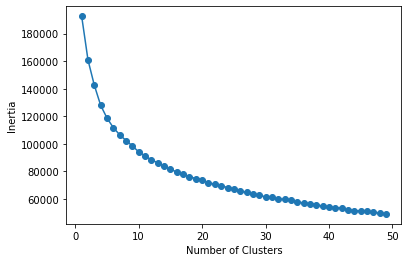

In [48]:
inertia = []
list_num_clusters = list(range(1,50))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(PCA_components)
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

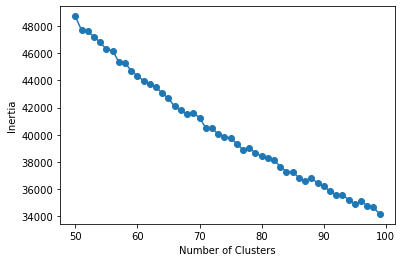

In [49]:
inertia = []
list_num_clusters = list(range(50,100))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(PCA_components)
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

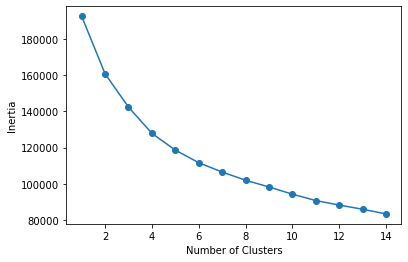

In [50]:
inertia = []
list_num_clusters = list(range(1,15))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(PCA_components)
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

# Using the elbow method we find that k = 6 clusters is the optimal choice

In [153]:
trav_rev = trav_rev.drop(columns = ['KM_preds'])

In [172]:
trav_rev = trav_rev.drop(columns = ['agglom'])

In [155]:
KM_mod = KMeans(n_clusters = 6)
KM_mod.fit(PCA_components)

KMeans(n_clusters=6)

In [156]:
KM_preds = KM_mod.predict(PCA_components)

In [157]:
trav_rev['KM_preds'] = KM_preds

In [158]:
trav_rev

,Churches,Resorts,Beaches,Parks,Theaters,Museums,Malls,Zoos,Restaurants,Bars,Services,Pizza/Burgers,Hotels,Juice Shops,Art,Dance Clubs,Pools,Gyms,Bakeries,Spas,Cafes,View Points,Monuments,Gardens,KM_preds
0,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,1.70,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,4
1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,2.65,1.70,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,4
2,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,1.70,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,4
3,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,2.64,1.73,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,4
4,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,1.70,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,1.04,1.02,1.06,1.29,1.29,5.00,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56,3
5452,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,1.02,1.01,1.04,1.27,1.27,0.89,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09,1
5453,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,1.00,0.99,1.00,1.08,1.25,0.87,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11,3
5454,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,0.98,0.97,0.98,1.06,1.23,5.00,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12,3


## To get an idea of the clusters we have, we can view scatter plots of the clusters along 2 categories, colored by cluster.

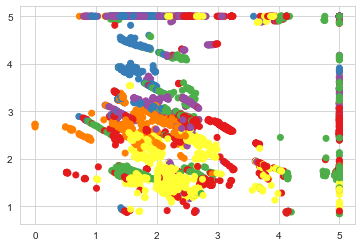

In [159]:
color_labels = trav_rev['KM_preds'].unique()

# List of colors in the color palettes
rgb_values = sns.color_palette("Set1", trav_rev['KM_preds'].nunique())

# Map continents to the colors
color_map = dict(zip(color_labels, rgb_values))
plt.scatter(trav_rev['Beaches'], trav_rev['Restaurants'], c = trav_rev['KM_preds'].map(color_map), label=color_map)

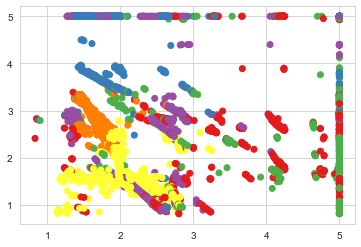

In [160]:
plt.scatter(trav_rev['Parks'], trav_rev['Bars'], c = trav_rev['KM_preds'].map(color_map), label=color_map)

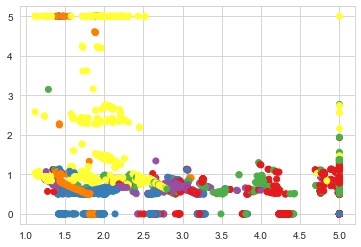

In [161]:
plt.scatter(trav_rev['Theaters'], trav_rev['Gyms'], c = trav_rev['KM_preds'].map(color_map), label=color_map)

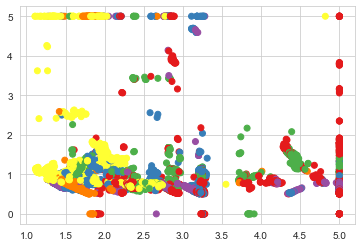

In [162]:
plt.scatter(trav_rev['Museums'], trav_rev['Dance Clubs'], c = trav_rev['KM_preds'].map(color_map), label=color_map)

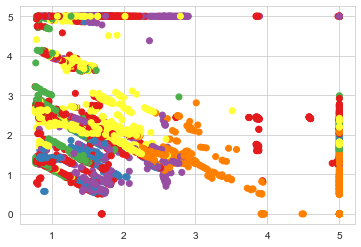

In [165]:
plt.scatter(trav_rev['Hotels'], trav_rev['Resorts'], c = trav_rev['KM_preds'].map(color_map), label=color_map)

# So far the most obviously compact cluster has been the yellow cluster, but if we wish to see the interests of all clusters in this way we would need to make (24 choose 2) = 276 plots which is not reasonable. An alternative method we can use would be to look at the average review score of each cluster for each category. This method is not as useful for showing variance among clusters but is an obviously more efficient method as we reduce the number of plots needed from 276 down to 1.

In [163]:
avg_ratings = []
for k in range(6):
    ratings = []
    trav = trav_rev[trav_rev['KM_preds'] == k]
    for c in range(24):
        r = trav[trav.columns[c]].mean()
        ratings.append(r)
    ratings.append(k)
    avg_ratings.append(ratings)
df = pd.DataFrame.from_records(avg_ratings)
df.columns = trav_rev.columns
df

,Churches,Resorts,Beaches,Parks,Theaters,Museums,Malls,Zoos,Restaurants,Bars,Services,Pizza/Burgers,Hotels,Juice Shops,Art,Dance Clubs,Pools,Gyms,Bakeries,Spas,Cafes,View Points,Monuments,Gardens,KM_preds
0,1.228176,1.592395,1.691266,2.181494,2.278985,2.565918,3.698734,3.652235,4.536306,4.484664,4.162087,2.089989,1.840490,1.343261,1.378997,1.100103,0.668609,0.390445,0.355257,0.444059,0.579795,1.233124,1.092064,1.191003,0
1,1.647366,2.234444,3.122167,4.304033,4.070768,3.192620,2.730302,2.194582,2.675446,2.722661,2.678820,1.601056,1.878628,1.281193,1.194472,1.213224,0.870219,0.668738,0.621907,0.981838,1.051289,4.804033,2.487942,1.770316,1
2,1.146639,2.881394,2.312029,2.283798,2.531145,3.445786,4.642425,3.216181,4.430187,3.177752,2.236191,1.911176,2.057440,3.000333,3.702633,0.851342,0.664370,0.654912,0.711041,0.839605,0.825463,0.914724,0.897440,1.026285,2
3,2.353344,2.676881,2.472990,2.208639,2.029164,1.861640,1.942090,1.573548,1.742787,1.581093,1.576752,1.438950,1.545230,1.857256,2.345863,1.630879,1.813591,1.926420,2.508735,2.120815,1.873194,2.670536,2.469432,2.637170,3
4,1.393418,2.766196,3.177801,3.674502,4.334361,3.815126,3.662957,2.449316,2.650379,2.425275,2.051018,2.051077,1.969324,1.682541,1.313796,1.047756,0.662065,0.491152,0.581857,0.709168,0.752890,0.852816,1.475810,1.666530,4
5,0.805311,1.050869,1.665590,1.652016,1.668902,1.681443,3.028443,1.973885,2.747508,2.859180,3.162082,3.931410,4.176574,4.853230,3.999508,1.489639,1.207131,0.939852,1.178115,1.002689,0.721951,0.735721,0.703066,0.803295,5


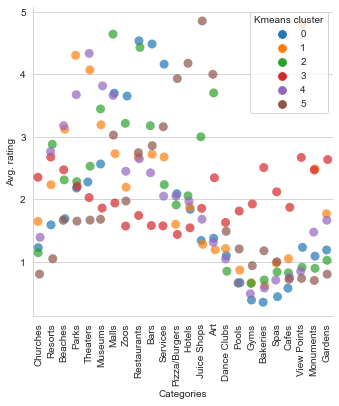

In [164]:
dfm = df.melt('KM_preds', var_name='Categories', value_name='Avg. rating')
sns.set_style("whitegrid")
p = sns.catplot(x="Categories", y="Avg. rating", hue='KM_preds', data=dfm, kind='strip', s=9, alpha=.7, legend=False)
plt.xticks(rotation=90)
plt.legend(title="Kmeans cluster")
plt.show()

# Insight of Groups from K-Means k=6 Model:

## Group 0 consists of users who enjoy Bars, Restaurants, Zoos, and Services the most of all groups, with corresponding average ratings for these groups of 4.48, 4.53, 3.65, and 4.16 respectively. These users also seem to be the least likely to use or enjoy Gyms, Bakeries, Spas, or Cafes, as the average score in these categories is the lowest of all groups at 0.39, 0.35, 0.44, and 0.57 respectively. Users in this group generally enjoy shopping at Malls with a 3.69 average rating. This group has slightly neutral opinions on Parks, Theaters, Museums and Pizza/Burgers, rating these at 2.18, 2.27, 2.56, and 2.08. In all other unmentioned categories this group tends to have a generally negative opinion, with most average ratings below 2.0. 

## Group 1 consitsts of users who love View Points with an average rating of 4.8 and enjoy Beaches at 3.12, Parks at 4.30, Theaters at 4.07, and Museums at 3.19. Note this group is leaves much higher reviews than all other groups on View Points with the second highest group average at 2.67 meaning that View Points is the category which distinguishes this group the most. They are also the group with the highest average rating for Parks, indicating this group is generally interested in scenic outdoors, and may enjoy visiting national parks. This group surprisingly has the lowest average rating for any group on Art, indicating that they probably enjoy living in the moment, or maybe they have not seen art related to landscapes in the shows. This group also leaves generally mild reviews for Restaurants and Bars and Services indicating that food and night life does not provoke strong emotions for this group with average scores of 2.67, 2.72, and 2.67 respectively. For this group we find that all other categories they are generally disinterested in, with average ratings below 2.0.


## Group 2 loves to shop with the highest average rating among all groups for Malls at 4.64, which is 0.95 stars higher than all other groups. This group also loves Restaurants with an average rating of 4.43. Users in this group also generally enjoy Museums, Zoos, Bars, Juice Shops, and Art with average scores of 3.44, 3.21, 3.17, 3.00, and 3.70 respectively. This group is also the most likely to stay in a Resort, however this does not say much as the average rating for this category is 2.88, which is not great, meaning that no group is generally thrilled about staying at a resort. Group 2 also generally dislikes Churches, Dance Clubs, View Points, Monuments, and Gardens with average scores of 1.14, 0.85, 0.91, 0.89, and 1.02. This is the lowest score for Dance Clubs of all groups and is the only group with an average score below 1.0.


## Group 3 seems to be a generally neutrally opinionated group with scores in all groups between a maximum of 2.67 for View Points, and a minimum of 1.43 for pizza/burgers. This group is the most likely to visit a Gym, Pool or Bakery, but this is not saying much considering that the group average in these are 1.92, 1.81, and 2.50 respectively, meaning that this group is not overly enthusiastic about these activities even though they are they group with the highest score in the category. This group has the lowest average rating of all groups in the following categorys: Malls, Zoos, Restaurants, Bars, Services, Pizza/Burgers, and Hotels. This group is the most likely to enjoy a church with a resoundingly neutral or slightly negative average rating of 2.35. This group is very useless in the context of advertising to the users as they do not seem to like anything.


## Group 4 tends to enjoy Theaters with the highest group average rating at 4.33 for the category. This group also generally likes Beaches at 3.17, Parks at 3.67, Museums at 3.81, and Malls at 3.66. This group seems to dislike night life and dining activities, with average ratings for Restaurants at 2.65, Bars at 2.42, and Services at 2.05.

## Group 5 loves Pizza/Burgers, Hotels, Juice Shops and Art much more than any of the other groups with average scores of 3.93, 4.17, 4.85, and 3.99 respectively. This group also enjoys the Mall at 3.02 and using Services with a 3.16 average ratings. They tend to have mildly positive experiences at Bars, with a 2.85, and Restaurants with 2.74. In all other categories this group tends to have a neutral or negative opinion.

## I dont think this model would be very useful for advertising, as it seems that only 2 of the groups, 1 and 5, have an obvious nietch that can be advertised towards, while groups 0, 2, and 4 have very overlaped opinions on general travel topics. This seems to suggest that the distance between the means of our groups is probably not large suggesting that maybe we started from a set of suboptimal points. Lastly, group 3 is entirely useless to advertisers as we have found no activities that they even like. We could try to retune the model using a new subset of points to start, but I think we may be better off just using a different model.

# Agglomerative Clustering

In [166]:
from sklearn.cluster import AgglomerativeClustering

## Agglomerative Hierarchical clustering joins observations into groups based on the distance of points to a defined point of reference to a group. The point of reference is defined as the linkage and has many different posible definitions which can change the strength of the model quite significantly.

## Agglomerative clustering is a bottom-up method for grouping points together. To start, every point is considered to be in its own group, then points are joined to the point or group that they are the minimum distance away from (actually we are minimizing any type of function and we can expand this to consider entropy, variance, etc.). To start the two closest points are joined, then these points are replaced in the list of points by their defined linkage point. This process is repeated until the number of points in the list of possible (linkage) points to group together is equal to the selected number of desired clusters.

## Agglomerative clustering can be visualized by a dendrograph where the root is the entire dataset as 1 group and the leaves are single observations, and each node joins groups of minimum distance at the level below it.


## Python allows 4 chioces for the linkage but note that there are many others. I will be using the 4 options and find that which performs the best. These linkages are defined below:


## 1. Ward Linkage - Wards criterion for linkage is that on each iteration we will join groups such that the total increase in variance for any group will be minimized. In other words the increase in the sum of squares distance to the average point of a group must be minimized

## 2. Complete Linkage - The points with the maximum possible distance from one another are considered when deciding if two groups should be joined to one another. On each iteration the groups or points where the maximum possible distance is minimal compared to all other possible joined pairs, will themselves be joined into a new group.

## 3. Average Linkage - Each group can be considered as the point which represents the average of all points in the group. Then groups with the minimum distance between their average point are joined together at each iteration.

## 4. Single Linkage - Groups are joined if the distance between the closest point in each group is minimized compared to all other possible choices of groups to join at each iteration.

In [173]:
ward = AgglomerativeClustering(n_clusters=6, linkage='ward', compute_full_tree=True)
ward = ward.fit(PCA_components)
ward_preds = ward.fit_predict(PCA_components)

In [174]:
ward_preds

array([4, 4, 4, ..., 3, 3, 3], dtype=int64)

In [175]:
trav_rev['ward'] = ward_preds

In [201]:
avg_ratings_ward = []
for k in range(6): 
    ratings = []
    trav = trav_rev[trav_rev['ward'] == k]
    trav = trav.drop(columns = ['KM_preds'])
    for c in range(24):
        r = trav[trav_rev.columns[c]].mean()
        ratings.append(r)
    ratings.append(k)
    avg_ratings_ward.append(ratings)
df = pd.DataFrame.from_records(avg_ratings_ward)
cols = trav_rev.columns[0:24].tolist()
cols.append(trav_rev.columns[25])
df.columns = cols
df

,Churches,Resorts,Beaches,Parks,Theaters,Museums,Malls,Zoos,Restaurants,Bars,Services,Pizza/Burgers,Hotels,Juice Shops,Art,Dance Clubs,Pools,Gyms,Bakeries,Spas,Cafes,View Points,Monuments,Gardens,ward
0,1.194030,2.075496,1.984669,2.292391,2.574068,3.018489,4.093241,3.413459,4.258474,3.774662,3.455451,2.000383,1.716767,1.750376,1.406639,1.064602,0.664429,0.472729,0.476609,0.587218,0.639662,1.036030,0.958699,1.109752,0
1,0.839806,1.080548,1.650403,1.632500,1.631274,1.648355,3.020129,1.972742,2.696210,2.809758,3.050000,3.848484,4.076790,4.731903,4.061968,1.725500,1.450500,1.163387,1.118919,0.984387,0.768435,0.773452,0.754177,0.839677,1
2,2.371022,2.666257,2.443972,2.213042,2.023800,1.846051,1.892652,1.556533,1.699713,1.569736,1.569001,1.425649,1.524340,1.840184,2.212744,1.527382,1.708060,1.843467,2.615247,2.011573,1.925982,2.737509,2.490930,2.742870,2
3,1.646242,2.340000,3.127935,4.152365,3.875798,3.094730,2.715330,2.175378,2.822521,2.641393,2.646267,1.528115,1.961561,1.376651,1.430516,1.181080,0.854622,0.674130,0.743649,1.353217,1.024934,4.441597,2.319568,1.676194,3
4,1.436205,2.770845,3.170617,3.752620,4.392908,3.803035,3.579975,2.523043,2.613576,2.544903,2.056813,2.201209,2.168588,1.798597,1.266940,1.084184,0.680871,0.490803,0.540093,0.585207,0.746991,0.877963,1.638090,1.773398,4
5,1.127884,2.708449,2.316349,2.218013,2.457189,3.336834,4.560969,3.145380,4.518045,3.416607,2.296834,1.894863,2.040258,2.930969,4.892052,0.687286,0.631179,0.635202,0.689548,0.798110,0.852084,0.921842,0.922229,1.026107,5


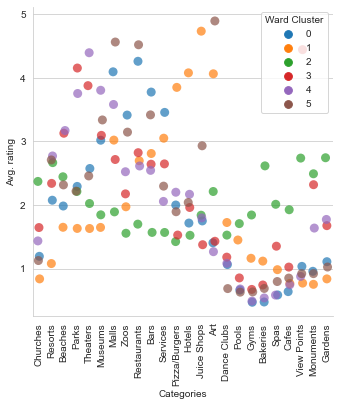

In [202]:
dfm = df.melt('ward', var_name='Categories', value_name='Avg. rating')
sns.set_style("whitegrid")
p = sns.catplot(x="Categories", y="Avg. rating", hue='ward', data=dfm, kind='strip', s=9, alpha=.7, legend=False)
plt.xticks(rotation=90)
plt.legend(title="Ward Cluster")
plt.show()

## Although the group numbers have switch around a bit, this model seems to be almost identical to the previous K-Means model, so for now I will not be analyzing this further. I will list the similar groups in each model below.


## K Means Group 5 is roughly equivalent to the Ward Model Group 1


## K Means Group 3 is roughly equivalent to the Ward Model Group 2

## K Means Group 4 is roughly equivalent to the Ward Model Group 4

## K Means Group 1 is roughly equivalent to Ward Model Group 3

## K Means Group 2 is roughly equivalent to Ward Model Group 0

## K Means Group 0 is roughly equivalent to Ward Model Group 5


## There do exist some changes, like Ward Model Group 5 Likes Art a lot more than K Means Group 0 but overall there is not many other changes.

In [203]:
cmplt = AgglomerativeClustering(n_clusters=6, linkage='complete', compute_full_tree=True)
cmplt = cmplt.fit(PCA_components)
cmplt_preds = cmplt.fit_predict(PCA_components)

In [204]:
trav_rev['cmplt'] = cmplt_preds

In [205]:
avg_ratings_cmplt = []
for k in range(6):
    ratings = []
    trav = trav_rev[trav_rev['cmplt'] == k]
    trav = trav.drop(columns = ['KM_preds', 'ward'])
    for c in range(24):
        r = trav[trav_rev.columns[c]].mean()
        ratings.append(r)
    ratings.append(k)
    avg_ratings_cmplt.append(ratings)
df = pd.DataFrame.from_records(avg_ratings_cmplt)
cols = trav_rev.columns[0:24].tolist()
cols.append(trav_rev.columns[26])
df.columns = cols
df

,Churches,Resorts,Beaches,Parks,Theaters,Museums,Malls,Zoos,Restaurants,Bars,Services,Pizza/Burgers,Hotels,Juice Shops,Art,Dance Clubs,Pools,Gyms,Bakeries,Spas,Cafes,View Points,Monuments,Gardens,cmplt
0,0.946477,1.235085,1.677748,1.710533,1.725375,1.720932,2.982567,2.159782,2.882966,2.927627,3.285073,3.700630,3.799383,3.936598,3.544964,1.712373,1.611707,1.341332,1.327639,0.853535,0.700303,0.810835,0.876247,0.929286,0
1,1.440642,2.290752,2.230441,3.047633,3.791896,3.856279,4.255025,2.777041,3.287673,2.396048,2.154684,2.128044,2.758766,2.680120,1.849007,0.877282,0.727101,0.636520,0.710050,0.792217,0.775617,1.146359,1.264754,1.751143,1
2,2.331427,2.875946,2.673611,2.369578,2.125859,1.915859,1.867686,1.497459,1.818400,1.469427,1.480281,1.329146,1.439319,1.721524,2.135762,1.379849,1.409092,1.523135,2.317751,2.335416,1.877416,2.813395,2.423114,2.641935,2
3,1.506061,2.712895,3.611640,4.185325,4.332246,3.640456,3.046333,2.282947,2.439342,2.500009,2.398026,1.749377,1.603886,1.232482,1.236132,1.116535,0.758588,0.503009,0.474860,0.514219,0.752219,2.691193,2.177570,1.610754,3
4,1.174163,2.308082,2.157816,2.310680,2.496415,2.952401,4.177810,3.507129,4.440068,4.111871,3.305238,1.938170,1.676265,1.996150,2.565599,0.999653,0.608707,0.481639,0.503946,0.626980,0.693190,1.121361,0.990374,1.089306,4
5,1.273469,2.106429,2.141531,4.577449,3.708061,2.636327,2.423878,1.701020,4.149490,4.026633,0.910612,0.887143,0.900612,0.998469,1.095306,2.042551,0.608163,0.593469,0.613367,2.999694,3.109592,4.280714,1.926327,1.226122,5


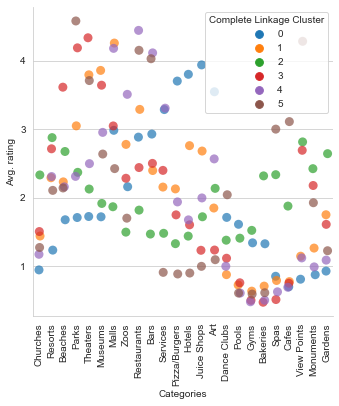

In [206]:
dfm = df.melt('cmplt', var_name='Categories', value_name='Avg. rating')
sns.set_style("whitegrid")
p = sns.catplot(x="Categories", y="Avg. rating", hue='cmplt', data=dfm, kind='strip', s=9, alpha=.7, legend=False)
plt.xticks(rotation=90)
plt.legend(title="Complete Linkage Cluster")
plt.show()

# Insight of Groups from Complete Linkage Model:


## Group 0 contains users who like Pizza/Burgers, Hotels, Juice Shops, and Art more than any other group with average ratings for these categories as 3.70, 3.79, 3.93, and 3.54 respectively. These users tend to have positive experiences using Services too, with an average rating of 3.28. Users in this group seem to enjoy shoping, with an average rating of 2.98 for Malls. These users tend to have somewhat positive experiences at Restaurants and Bars with average ratings of 2.88 and 2.92 respectively. This group is the least likely to enjoy usual tourist attractions, with the lowest average rating of all groups for Churches, Resorts, Beaches, Parks, Theaters, Museum, View Ponts, Monuments, and Gardens, rating these categories all less than 1.75 Stars.


## Group 1 loves indoor activites with average ratings for Museums and Malls higher than any other groups, rating these activites 3.85 and 4.25 respectively. This group also enjoys Theaters with an average rating of 3.79. For meals, this group prefers Restaurants - with an average rating of 3.28 - over Bars and Pizza/Burgers - rating these 2.39 and 2.12 respectivey. This group seems to enjoy parks, with an averae rating of 3.04, but tends to have negative opinions of other outdoor activities with average ratings for Beaches at 2.23, View Points at 1.14, Monuments at 1.26, and Gardens at 1.75.  This group is the least likely to visit a Dance Club, with an average rating of 0.87.


## Group 2 is the same group we have seen before with no clear interests, with their highest average rating of 2.87 for resorts, and a minimum rating of 1.32 for Pizza/Burgers.


## Group 3 loves Beaches and Theaters more than any other groups with average ratings of 3.61 and 4.33 respectively. This group also loves Parks rating them 4.18 on average. These users also enjoy Museums (3.64) and shopping at Malls (3.04). In all other categories this group tends to have neutral or negative opinions, but we can see that this group prefers Resorts (2.71) over Hotels (1.60).


## Group 4 consists of Food Fanatics who love to shop. This group has the highest average rating for Restaurants at 4.44, and Bars at 4.11 indicating that they love to wine and dine, but surprisingly they seem to dislike fast food with an average rating of 1.93 for Pizza/Burgers. This group loves shopping at Malls with an average rating of 4.17. This group also has the highest average rating for Zoos at 3.50. This group has a generally positive opinion of Museums with an average rating of 2.95. These users have positive experiences using Services with an average rating of 3.30, the highest of all groups (only by 0.02 Stars). This group has neutral or negative opinions in all other categories.


## Group 5 loves scenic outdoors and eating out. This group has the highest average rating for Parks at 4.57 as well as the highest average rating for View Points at 4.28. This group has the second highest ratings for Restaurants at 4.14 and Bars at 4.02 (only slightly behing Group 4 in these categories). This group also enjoys Spas more than any other group with an average rating of 3.0. They also like Cafes more than any other group with an average rating of 3.10. This group is the most likely to visit a Dance Club with an average rating of 2.04. This group is the least likely to use Bars, Services, Pizza/Burgers, Hotels or Juice Shops, being the only group with a score below 1.0 in all of these categories. This group also has the lowest average rating for Art at 1.09.

In [207]:
avg_link = AgglomerativeClustering(n_clusters=6, linkage='average', compute_full_tree=True)
avg_link = avg_link.fit(PCA_components)
avg_link_preds = avg_link.fit_predict(PCA_components)

In [208]:
trav_rev['avg_link'] = avg_link_preds

In [209]:
avg_ratings_avg_link = []
for k in range(6):
    ratings = []
    trav = trav_rev[trav_rev['avg_link'] == k]
    trav = trav.drop(columns = ['KM_preds', 'ward', 'cmplt'])
    for c in range(24):
        r = trav[trav_rev.columns[c]].mean()
        ratings.append(r)
    ratings.append(k)
    avg_ratings_avg_link.append(ratings)
df = pd.DataFrame.from_records(avg_ratings_avg_link)
cols = trav_rev.columns[0:24].tolist()
cols.append(trav_rev.columns[27])
df.columns = cols
df

,Churches,Resorts,Beaches,Parks,Theaters,Museums,Malls,Zoos,Restaurants,Bars,Services,Pizza/Burgers,Hotels,Juice Shops,Art,Dance Clubs,Pools,Gyms,Bakeries,Spas,Cafes,View Points,Monuments,Gardens,avg_link
0,0.846614,1.101503,1.661060,1.637468,1.645427,1.674082,3.011377,1.984272,2.707611,2.802215,3.049446,3.838940,4.062927,4.676203,4.008972,1.750759,1.473861,1.222816,1.174731,0.970095,0.767057,0.779968,0.762627,0.844114,0
1,1.640905,2.214225,2.898418,4.192633,4.142373,3.222008,2.947159,2.379729,2.740479,2.789636,2.786597,1.921530,2.139209,1.366899,1.262497,1.130021,0.862789,0.703954,0.648189,0.837784,0.961290,3.839865,2.931977,1.983434,1
2,3.367692,5.000000,2.742308,1.308462,1.886923,3.823846,4.266923,4.906923,3.697692,2.819231,2.163077,1.530769,3.200769,4.353846,1.454615,0.804615,0.822308,0.823846,1.053846,2.290769,0.467692,0.473846,0.496154,1.650000,2
3,2.317193,2.793877,2.600520,2.325884,2.098191,1.913306,1.921247,1.539376,1.864771,1.517214,1.510655,1.381216,1.480062,1.777900,2.237900,1.429054,1.591736,1.692599,2.508701,2.320052,1.840811,2.723035,2.403576,2.588877,3
4,1.233109,2.452471,2.497425,2.751144,3.145404,3.374898,4.033986,3.039459,3.763896,3.291393,2.707487,1.977754,1.909470,2.050239,2.118825,1.012808,0.646520,0.485865,0.514146,0.615972,0.722388,0.950489,0.947965,1.235168,4
5,0.000000,1.403333,1.400000,1.416667,1.923333,1.873333,2.680000,2.696667,3.310000,3.883333,5.000000,3.643333,1.050000,0.836667,1.210000,2.783333,3.673333,0.340000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5


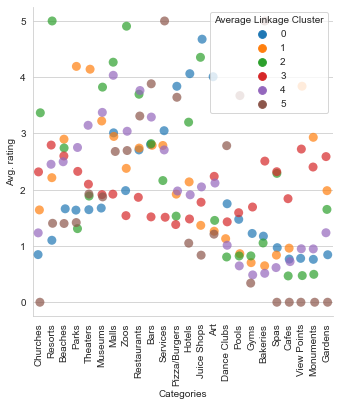

In [210]:
dfm = df.melt('avg_link', var_name='Categories', value_name='Avg. rating')
sns.set_style("whitegrid")
p = sns.catplot(x="Categories", y="Avg. rating", hue='avg_link', data=dfm, kind='strip', s=9, alpha=.7, legend=False)
plt.xticks(rotation=90)
plt.legend(title="Average Linkage Cluster")
plt.show()

# Insight of Groups from Average Linkage Model:

## Group 0 consists of users who love Art with an average rating of 4.00 and Juice shops with an average rating of 4.67. Members of this group also enjoy Pizza/Burgers rating them 3.83 on average and shopping at the Mall with an average rating of 3.01. These users tend to have somewhat positive experiences using Services with an average rating of 3.04, and tend to prefer staying in a Hotel, with an average rating of 4.06 for Hotels. These users are the least likely to stay in a Resort with an average rating of 1.10. Users in this group are not very religious, rating Churches at 0.84 indicating that the majority of them did not even visit one.  Users in this group generally dislike Beaches (1.66), Parks (1.63), Gardens (0.84), View Points (0.77), and Monuments (0.76), indicting they ae not interested in outdoor activities. These users seem to prefer fast food as they have rated Bars and Restaurants at 2.80 and 2.70 respectively, despite rating fast food restaurants at 3.83.


## Group 1 seems to be a group of outdoorsy people, as this category has the highest average ratings of all groups in Beaches (2.89), Parks (4.19), and View Points (3.83). Users in this group also generally love Theaters rating them 4.14 on average, and generally like Museums (3.22) and Monuments (2.93). This group has mixed or negative opinions in all other categories.


## Group 2 seems to consist of religious users with young children. This group loves to stay at Resorts with a perfect average rating of 5.0 but still has positive experiences at Hotels rating them at 3.20 on average. This group also loves Zoos with an average rating of 4.90 as well as shopping at Malls with an average rating of 4.26, the highest rating in both of these categories. Users in this group also have the highest average rating for Churches at 3.36. This group also enjoys Museums more than any other group with an average rating of 3.86. For dining they tend to prefer Restaurants, rating them 3.69 on average, as opposed to Bars (2.81), or fast food Pizza/Burgers (1.53). This group also loves Juice Bars rating them at 4.35 on average. In all other categories this group leaves generally negative average reviews.


## Group 3 appears to be a group with only mild or negative emotions in most topics. This group has a highest average rating of 2.79 for Resorts and a minimum average rating of  1.38 for pizza and burgers. As a consequence, this group is not generally easy to advertise to as they have no clear interests.


## Group 4 tends to enjoy dining and indoor activities. This group generally loves to shop, rating Malls a 4.03 on average. This group likes Theaters (3.14), Museums (3.37), and Zoos (3.03) but seems to leave negative reviews on all other activities. For food, this group prefers sit down dining and bars, rating Restaurants 3.76 on average and Bars 3.29 on average while they generally dislike fast food rating Pizza/Burgers at 1.97 on average.


## Group 5 seems to enjoy night life and generally dislikes daytime activities and loves Bakeries rating them a perfect 5.0 on average. This group tends to enjoy swimming much more than other groups, rating Pools at 3.67 on average, which is higher than all other groups by 2.08 stars. This group always rates Services a perfect 5.0 and tends to enjoy Bars (3.88 average rating) and has the highest average rating for Dance Clubs of all groups at 2.78. This group tends to dislike outdoor activities, rating Beaches and Parks 1.40 and 1.41 respectively while totally ignoring View Points, Monuments and Gardens, rating all 3 a perfect 0. This group has also left no reviews on Churches, Spas, and Cafes.

In [211]:
sing_link = AgglomerativeClustering(n_clusters=6, linkage='single', compute_full_tree=True)
sing_link = sing_link.fit(PCA_components)
sing_link_preds = sing_link.fit_predict(PCA_components)

In [212]:
trav_rev['sing_link'] = sing_link_preds

In [213]:
avg_ratings_sing_link = []
for k in range(6):
    ratings = []
    trav = trav_rev[trav_rev['sing_link'] == k]
    trav = trav.drop(columns = ['KM_preds', 'ward', 'cmplt', 'avg_link'])
    for c in range(24):
        r = trav[trav_rev.columns[c]].mean()
        ratings.append(r)
    ratings.append(k)
    avg_ratings_sing_link.append(ratings)
df = pd.DataFrame.from_records(avg_ratings_sing_link)
cols = trav_rev.columns[0:24].tolist()
cols.append(trav_rev.columns[28])
df.columns = cols
df

,Churches,Resorts,Beaches,Parks,Theaters,Museums,Malls,Zoos,Restaurants,Bars,Services,Pizza/Burgers,Hotels,Juice Shops,Art,Dance Clubs,Pools,Gyms,Bakeries,Spas,Cafes,View Points,Monuments,Gardens,sing_link
0,1.455661,2.320266,2.489004,2.797461,2.960123,2.89412,3.351895,2.540879,3.125964,2.83242,2.54847,2.077819,2.12585,2.191972,2.205581,1.191633,0.947764,0.822557,0.970165,0.999945,0.966313,1.750508,1.530985,1.560405,0
1,0.570000,1.350000,1.370000,1.560000,1.450000,1.44000,2.590000,2.620000,5.000000,5.00000,5.00000,1.210000,5.00000,0.850000,0.870000,5.000000,5.000000,0.530000,0.000000,0.000000,0.000000,3.240000,0.520000,0.560000,1
2,4.630000,3.990000,5.000000,5.000000,2.730000,2.37000,1.700000,0.990000,0.970000,0.94000,0.93000,0.940000,1.03000,1.220000,5.000000,0.680000,0.660000,0.670000,0.810000,0.720000,1.130000,1.190000,1.180000,5.000000,2
3,0.580000,1.350000,1.390000,1.570000,1.420000,2.59000,2.590000,3.210000,5.000000,5.00000,5.00000,5.000000,1.00000,0.850000,5.000000,5.000000,5.000000,0.520000,0.000000,0.000000,0.000000,3.240000,0.530000,0.560000,3
4,1.230000,1.220000,5.000000,1.260000,1.280000,3.14000,5.000000,2.860000,1.770000,1.75000,5.00000,1.060000,0.91000,0.890000,0.900000,0.930000,1.120000,0.570000,0.550000,0.540000,0.560000,0.700000,5.000000,2.510000,4
5,0.590000,0.640000,1.470000,1.460000,1.470000,1.49000,2.150000,2.570000,3.190000,3.16000,5.00000,3.780000,5.00000,1.090000,0.750000,0.740000,0.750000,5.000000,0.990000,5.000000,0.550000,0.540000,0.550000,0.570000,5


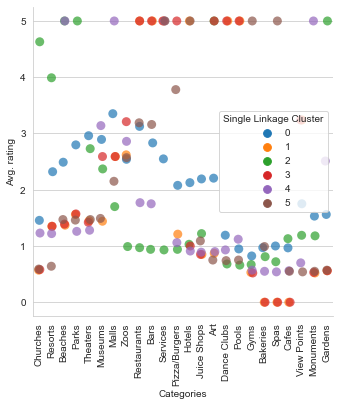

In [215]:
dfm = df.melt('sing_link', var_name='Categories', value_name='Avg. rating')
sns.set_style("whitegrid")
p = sns.catplot(x="Categories", y="Avg. rating", hue='sing_link', data=dfm, kind='strip', s=9, alpha=.7, legend=False)
plt.xticks(rotation=90)
plt.legend(title="Single Linkage Cluster")
plt.show()

# Insight of Groups from Single Linkage Model:

## Group 0 (in Blue) Appears to be a Group that Leaves Mild Reviews across all categories but has some interest in going to the Mall, Dining at Restaurants, and visiting Beaches, Parks, Theaters, Museums, Bars, and using Services. 

## Group 1 (in Orange) is hard to spot on the plot so it may be helpful to look at the Table to get a better Idea of their interests. This group consists of people who gave perfect score reviews on Restaurants, Bars, Services, Dance Clubs, and Pools.  Members of this cluster also left no reviews for Bakeries, Spas, or Cafes So far this makes group 1 entirely identical to group 3, but there are 2 key differences. Interestingly this group gave all 5 star reviews for Hotels, while we see a staggering contrast of 1.35 average review score for Resorts. Group 3 on the other hand gave hotels an average 1.0 rating and resorts an equal 1.35 rating. Also group 1 has an average review on Pizza/Burgers of 1.21 while Group 3 has a 5.0 rating for Pizza and Burgers.

## Group 2 seems to consist of users who enjoy outdoor Daytime activities (maybe they have active young children). This group consists of users who left perfect 5 star reviews for Beaches, Parks, and Gardens. This group is by far the most Religious with a 4.63 average rating on Churches, while all other groups were below 1.5 in this category. This group tends to prefer Resorts with a 3.99 average rating over Hotels with a 1.03 average rating (another indication this may be young families) and leave the highest rating on Resorts of all groups, while all other groups rate Resorts below 2.35. This group left the lowest average reviews of all groups on Malls, Zoos, Restaurants, Bars, Services, Pizza/Burgers, Dance Clubs, and Pools, indicating they are picky eaters who dislike night life, and shopping, leaving an average review score at or below 1.0 in all these areas.

## Group 3 as previously discussed shows that people who have not attended Bakeries, Spas, or Cafes, gave every single Restaurant, Bar, Dance Clubs, Pizza/Burgers, and Pools a perfect rating, indicating that these people exclusively enjoy night life activities and food. These people tend to hate established Hotels and Resorts, indicating these people must have a tendency to use not traditional lodging, such as Air BnB for example. This group has the highest averahe rating on Zoos at 3.21.


## Group 4 seems to be a group of travelers who like shopping, history, and beaches, while they avoid night life. This cluster consists of users who have given beaches, malls, and monuments all perfect 5 star ratings, and they also have the highest average rating on museums of all groups, at 3.14.  This group left generally negative reviews on both hotels, 0.99, and resorts, 1.22,  indicating they may use alternative lodging as well. This group tends to be picky eaters with average ratings of 1.77 on Restaurants, 1.75 on Bars, 1.06 on Pizza/Burgers, and 0.89 on Juice Shops. They dislike Dance Clubs with a 0.93 average rating indicating with their Bar score they do not enjoy night life. Surprisingly these users also hated Art with a 0.9 average rating suggesting they do not like visual Museums, only educational ones. These users left mild reviews on Gardens at 2.51, the 2nd highest in category, but disliked parks leaving the lowest average score in the category at 1.26 and the 2nd lowest score on viewpoints at 0.7, indicating again they are not interested in visually pleasing experiences. These users left perfect 5 star ratings on services.

## Group 5 seems to be the health fanatics, who left perfect 5 star reviews on Spas, Gyms, Hotels, and Services. These people tend to be relatively mild in terms of their food and night life reviews, with average scores for these as follows, Restaurants: 3.19, Bars: 3.16, Pizza/Burgers: 3.78. These people also tend to go shopping and visit zoos but leave slightly negative reviews with an average of 2.15 and 2.76 respectively. In all other categories the average score for this group is below 1.5 indicating they do not particularly care for these activities.

## Looking at the plots of the different models we can see that the Single Linkage Model has clearly performed the best at finding 6 groups with distinct interests, as in all other models there was at least one group with no clear interests at all. This model also was able to find for all groups except group 0, some category in which all members rated the category a perfect 5 Stars.

## We should still perform other tests to see the strengths of each model which we will continue with now.

In [244]:
trav_rev[trav_rev.columns[24:]]

,KM_preds,ward,cmplt,avg_link,sing_link
0,4,4,3,4,0
1,4,4,3,4,0
2,4,4,3,4,0
3,4,4,3,4,0
4,4,4,3,4,0
...,...,...,...,...,...
5451,3,3,2,3,0
5452,1,3,2,1,0
5453,3,3,2,3,0
5454,3,3,2,3,0


## First we should see the relative group sizes

In [217]:
trav_rev['KM_preds'].value_counts()

4    1346
2     961
3     933
0     877
1     729
5     610
Name: KM_preds, dtype: int64

In [219]:
trav_rev['ward'].value_counts()

0    1330
4    1183
2     871
3     833
1     620
5     619
Name: ward, dtype: int64

In [220]:
trav_rev['cmplt'].value_counts()

4    1470
3    1140
1     997
2     925
0     826
5      98
Name: cmplt, dtype: int64

In [221]:
trav_rev['avg_link'].value_counts()

4    2885
3     962
1     961
0     632
2      13
5       3
Name: avg_link, dtype: int64

In [222]:
trav_rev['sing_link'].value_counts()

0    5451
3       1
2       1
5       1
1       1
4       1
Name: sing_link, dtype: int64

## We can see now, that although the single linkage model looked good before, this was only because it separated 5 users into their own groups while the rest of the users were in one large group. This is clearly not in any way useful to advertisers as making 5 personalized advertisements for 5 different users is not cost effective.

## Similarly we find that the average linkage and complete linkage models have some very small groups that could be less than useful for advertising.

## Thus we find that purely based on group sizes, the models for K Means and Hierarchical Ward Clustering would be viable as they are the most cost efficient.

## For clusters to be useful, we would like the intracluster variances among users to be minimized so that users in a single cluster are similar, while the intercluster distances should be maximized so that we can be certain that users are included in the correct clusters.

## One way to measure such factors to determine the best model would be to use the Davies–Bouldin index which is given by the following formula:

![Davies-Bouldin Formula](https://wikimedia.org/api/rest_v1/media/math/render/svg/088c4609673b8a85f7901d9027215bca7f3c71be)
## where n is the number of clusters, c_i is the centroid of cluster i, sigma_i is the average distance of all elements in cluster i to centroid c_i, and d(c_i,c_j) is the distance between centroids c_i and c_j. Since algorithms that produce clusters with low intra-cluster distances (high intra-cluster similarity) and high inter-cluster distances (low inter-cluster similarity) will have a low Davies–Bouldin index, the clustering algorithm that produces a collection of clusters with the smallest Davies–Bouldin index is considered the best algorithm based on this criterion.

# Davies-Bouldin Index on Google Travel Data

In [223]:
from sklearn.metrics import  davies_bouldin_score as dave

In [230]:
dbi_kmeans = dave(trav_rev[trav_rev.columns[0:24]], trav_rev["KM_preds"])
dbi_ward = dave(trav_rev[trav_rev.columns[0:24]], trav_rev["ward"])
dbi_cmplt = dave(trav_rev[trav_rev.columns[0:24]], trav_rev["cmplt"])##

In [231]:
print("Davies-Bouldin Scores:")
print("K Means Model = " + str(dbi_kmeans))
print("Hierarchical Ward Model = " + str(dbi_ward))
print("Hierarchical Complete Linkage Model = " + str(dbi_cmplt))

Davies-Bouldin Scores:
K Means Model = 2.0690309811139387
Hierarchical Ward Model = 2.2496415849883857
Hierarchical Complete Linkage Model = 2.409257846491889


## According to the Davies-Bouldin index the K Means model performs the best for the data

# In some clustering algorithms the number of clusters is not set by the user and instead a make the user set a desired maximal distance among cluster members. This form of thinking can help determine the optimal number of clusters. One major clustering algorithm based on this idea is DBSCAN which I will run.

# DBScan: Density-Based Spatial Clustering of Applications with Noise

## DBSCAN is an algorithm for finding clusters based on the density of points in a region as suggested by the name. The algorithm requires 2 hyper parameters that will entirely define the way clusters are generated, however solutions may not be unique as the starting points for building the clusters may influence the shape of clusters.

## Hyperparameters for DBSCAN:

## 1. Epsilon - The maximum distance 2 points can be from 1 another to be considered within a neighborhood of one another.

## 2. Minimum samples/points - This defines how many neighbors a point must have to be considered a core point for a cluster. We will discuss core points and related definitions next.


## Core points are points with at least the minimum required epsilon neighborhood neighbors as defined above. If a point is a core point, then all of its neighbors belong to the same cluster.

## A point q is directly reachable from point core point p, if point q is in an epsilon neighborhood of p.

## A point z is reachable from point p1 if there is a path of core points from p1 to p2  up to some pn where each point in the path is directly reachable by its predecessor. This requires that all points in the path except possibly z must be core points


## All points not reachable by other points are outliers or noise points


## If a point p is a core point, then it forms a cluster with all points that are reachable from point p. If a point z is reachable from p but is not a core point, then z forms the edge of the cluster defined by point p.

## Note that reachability is not transitive since an edge point is not a core point, so we cannot say any point is reachable from an edge.

## By the definitions, the cluster to which edge points belong may be entirely dependent on the order in which points are reached by clusters, as an edge point may be within an epsilon region of 2 clusters but cannot be reassigned after an initial cluster reached it.



# Advantages of DBSCAN:

## 1. No need to specify number of clusters

## 2. Outliers are handled

## 3. Clusters can be arbitrary shapes, unlike usual clustering methods which look for radial distance based clusters toward a group center.


# Disadvantages of DBSCAN:

## 1. Cluster edges depend on order of reaching them

## 2. Definitions of Epsilon distance and minimum points for core points must be carefully selected as changes can drastically affect cluster shapes and sizes. Usually domain knowledge is required to set these efficiently

## 3. Feature Scales can affect performance

## DBSCAN on Google Travel Dataset

In [305]:
from sklearn.cluster import DBSCAN

In [494]:
DB_model = DBSCAN(eps=1.5, min_samples=10)

In [495]:
DB_model = DB_model.fit(PCA_components)

In [496]:
DB_preds = DB_model.labels_

In [497]:
trav_rev['DBSCAN'] = DB_preds

In [498]:
trav_rev['DBSCAN'].nunique()

93

In [499]:
trav_rev['DBSCAN'].value_counts()

-1     3221
 9      205
 18     113
 66      73
 65      64
       ... 
 36      10
 84      10
 49      10
 72      10
 91      10
Name: DBSCAN, Length: 93, dtype: int64

## As mentioned above, the model is very sensitive to the choice of Epsilon and min_samples. I cannot seem to find an appropriate choice of either value.

## We can see above that the model is able to find 92 clusters of at least 10 users who have a maximum distance of 1.5 away from one another on the PCA component data. The majority of these clusters have exactly 10 users, and we also are left with 3221 users who are labled as outliers.

## DBSCAN can be useful for defining dense small clusters, but for our purposes we want broader clusters so that we do not have to produce hundreds of individualized advertisements, meaning that DBSCAN is not practical for our purposes.

# Conclusions

## In the end we are left with the conclusion that of the clustering methods tested, K Means performs the best on the dataset for the purposes of producing clusters of users that have clear interests for travel for which we can produce customized advertisement campaigns.

## Using the ebow method when analyzing the Inertia vs Number of Clusters plot we found that the rate of decrease in inertia for the clusters began to slow down significantly between 6 and 7 clusters, indicating that 6 clusters would be an appropriate choice for the number of clusters.

## Using the Davies-Bouldin Index and by analyzing cluster sizes among models using 6 clusters, we found that the best model for our dataset was the K Means model.

## Analyzing plots of average ratings among the clusters we found that the 6 clusters produced can be described as follows:


# Insight of Groups from K-Means k=6 Model:

## Group 0 consists of users who enjoy Bars, Restaurants, Zoos, and Services the most of all groups, with corresponding average ratings for these groups of 4.48, 4.53, 3.65, and 4.16 respectively. These users also seem to be the least likely to use or enjoy Gyms, Bakeries, Spas, or Cafes, as the average score in these categories is the lowest of all groups at 0.39, 0.35, 0.44, and 0.57 respectively. Users in this group generally enjoy shopping at Malls with a 3.69 average rating. This group has slightly neutral opinions on Parks, Theaters, Museums and Pizza/Burgers, rating these at 2.18, 2.27, 2.56, and 2.08. In all other unmentioned categories this group tends to have a generally negative opinion, with most average ratings below 2.0. 

## Group 1 consitsts of users who love View Points with an average rating of 4.8 and enjoy Beaches at 3.12, Parks at 4.30, Theaters at 4.07, and Museums at 3.19. Note this group is leaves much higher reviews than all other groups on View Points with the second highest group average at 2.67 meaning that View Points is the category which distinguishes this group the most. They are also the group with the highest average rating for Parks, indicating this group is generally interested in scenic outdoors, and may enjoy visiting national parks. This group surprisingly has the lowest average rating for any group on Art, indicating that they probably enjoy living in the moment, or maybe they have not seen art related to landscapes in the shows. This group also leaves generally mild reviews for Restaurants and Bars and Services indicating that food and night life does not provoke strong emotions for this group with average scores of 2.67, 2.72, and 2.67 respectively. For this group we find that all other categories they are generally disinterested in, with average ratings below 2.0.


## Group 2 loves to shop with the highest average rating among all groups for Malls at 4.64, which is 0.95 stars higher than all other groups. This group also loves Restaurants with an average rating of 4.43. Users in this group also generally enjoy Museums, Zoos, Bars, Juice Shops, and Art with average scores of 3.44, 3.21, 3.17, 3.00, and 3.70 respectively. This group is also the most likely to stay in a Resort, however this does not say much as the average rating for this category is 2.88, which is not great, meaning that no group is generally thrilled about staying at a resort. Group 2 also generally dislikes Churches, Dance Clubs, View Points, Monuments, and Gardens with average scores of 1.14, 0.85, 0.91, 0.89, and 1.02. This is the lowest score for Dance Clubs of all groups and is the only group with an average score below 1.0.


## Group 3 seems to be a generally neutrally opinionated group with scores in all groups between a maximum of 2.67 for View Points, and a minimum of 1.43 for pizza/burgers. This group is the most likely to visit a Gym, Pool or Bakery, but this is not saying much considering that the group average in these are 1.92, 1.81, and 2.50 respectively, meaning that this group is not overly enthusiastic about these activities even though they are they group with the highest score in the category. This group has the lowest average rating of all groups in the following categorys: Malls, Zoos, Restaurants, Bars, Services, Pizza/Burgers, and Hotels. This group is the most likely to enjoy a church with a resoundingly neutral or slightly negative average rating of 2.35. This group is very useless in the context of advertising to the users as they do not seem to like anything.


## Group 4 tends to enjoy Theaters with the highest group average rating at 4.33 for the category. This group also generally likes Beaches at 3.17, Parks at 3.67, Museums at 3.81, and Malls at 3.66. This group seems to dislike night life and dining activities, with average ratings for Restaurants at 2.65, Bars at 2.42, and Services at 2.05.

## Group 5 loves Pizza/Burgers, Hotels, Juice Shops and Art much more than any of the other groups with average scores of 3.93, 4.17, 4.85, and 3.99 respectively. This group also enjoys the Mall at 3.02 and using Services with a 3.16 average ratings. They tend to have mildly positive experiences at Bars, with a 2.85, and Restaurants with 2.74. In all other categories this group tends to have a neutral or negative opinion.

## From this we have found 5 groups that would be easy to make tageted advertisements for, but we also have a 6th group, Group number 3 from above, that seems to be a poor choice of demographic for advertising. There are 2 possible reasons for this:

## 1. Group 3 may consist of users who only generally leave reviews when they have negative opinions and would like to see improvements to the place they visited.

## 2. This group may not like traveling that much and thus they have either had poor experiences due to their general opinion of traveling.



## Source of error:
## A major source of error in this project comes from the fact the blank reviews were conflated with negative opinions since they were stored as 0 star reviews, when they would make more sense to be stored as neutral opinions, since there was nothing they felt the need to complain or complement the establishments for. The issue with replacing 0 star reviews as neutral 2.5s however is that it is possible that these people avoided such places because they know that they do not like them. On top of this, some users may not have had the chance to visit places they actually would like to go, simply because they have not yet had the chance to travel to the location being used for extracting user review scores from. Since I do not have access to the exact review scores on each place of buisness, it is not possible to make a logical replacement for scores with 0s since any and all categories may be affected by the users inability to visit all buisnesses or their neglect to review all buisnesses, even if they had neutral opinions.

## Next Steps:

## For travel, many consumers can book both hotels or resorts and guided tours in single packages along with air fare or train fare if needed. Major competition to hotels/resorts now comes from Air/BnB which many travelers can get lodging for much cheaper on, however Air/BnB is not known for its package deals. An important next step would seem to be to include data on Air BnB customers to see which customers would be missing out on deals through travel packages as these would be the most valuable customers to hotels and resorts to advertise to.

## It would also be nice to find data on travel budgets from the users. If this information was available we could then use regression models to learn what activities members of a group are willing to spend the most money on and the effect that interest have on the overall budget. This would be helpful in the context of advertising as we could see the monetary return that could be expected based on targeted advertisement and we would know which activities to stress the most in adverts.